# Truth Preparation

Here I'll explore options for the preprocessing of map tiles and validated building polygons.  This will need to produce an input/output set suitable for machine learning.  Almost certainly this will be a pair of vectors for every image and building.  There are many questions surrouding the size and format, which I'll go into shortly.

In [2]:
%matplotlib inline 
import cv2
from matplotlib import pyplot as plt
import numpy as np

First, we'll load a tile then grab its corresponding building polygon:

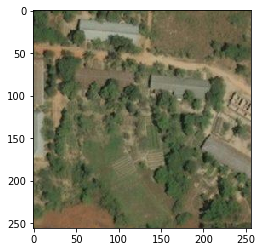

In [3]:
tile = cv2.imread('../data/sample/tiles/a132200332312220023.jpeg')
plt.imshow(cv2.cvtColor(tile, cv2.COLOR_BGR2RGB))

## Building Geometry

I'll manually import lines that should cover this map tile.  These correspond to project `2469`, task `1`.  Once imported we will convert coordinates into quadkeys until we find building that should exist within the tile above.  From there we can look at how to "label" our map tiles with these building polygons: our truth.

In [4]:
validated_buildings = [row.split(',') for row in """2469,1,473390717,16.8213471,94.7474071,16.8213471,94.7475141,16.8210484,94.747514,16.8210484,94.7474071,16.8213471,94.7474071
2469,1,473390803,16.8210331,94.7474035,16.8210314,94.747518,16.820742,94.7475133,16.8207437,94.7473987,16.8210331,94.7474035
2469,1,506921656,16.8208903,94.7485819,16.8207073,94.7489015,16.8206043,94.7488371,16.8207873,94.7485175,16.8208903,94.7485819
2469,1,506926864,16.8212526,94.7482122,16.8211683,94.7482026,16.8211277,94.7485918,16.821212,94.7486014,16.8212526,94.7482122
2469,1,506926866,16.8215696,94.7477813,16.8214509,94.7477674,16.8214083,94.7481646,16.821527,94.7481785,16.8215696,94.7477813
2469,1,506929405,16.8213009,94.747738,16.8211613,94.7477243,16.8211277,94.7480968,16.8212673,94.7481106,16.8213009,94.747738
2469,1,506933723,16.8198192,94.7492807,16.819781,94.7492581,16.819748,94.749319,16.8197862,94.7493416,16.8198192,94.7492807
2469,1,506933724,16.8201012,94.7490448,16.820048,94.7490107,16.8200175,94.7490626,16.8200706,94.7490967,16.8201012,94.7490448
2469,1,506933725,16.8199216,94.7496841,16.8198596,94.7496327,16.81981,94.749698,16.819872,94.7497494,16.8199216,94.7496841
2469,1,506933726,16.8199535,94.7483194,16.8198493,94.7483563,16.8198692,94.7484177,16.8199734,94.7483809,16.8199535,94.7483194
2469,1,506933727,16.8200777,94.7480914,16.8200008,94.7481227,16.8200184,94.7481697,16.8200953,94.7481384,16.8200777,94.7480914
2469,1,506933728,16.820252,94.7478972,16.820195,94.7479556,16.8201175,94.7478731,16.8201745,94.7478146,16.820252,94.7478972
2469,1,506933729,16.8200446,94.747571,16.8200476,94.7476687,16.8201529,94.7476651,16.8201499,94.7475674,16.8200446,94.747571
2469,1,506933730,16.8201529,94.7477793,16.820152,94.7476851,16.820048,94.7476863,16.8200489,94.7477805,16.8201529,94.7477793
2469,1,506933731,16.8197368,94.7494441,16.8196816,94.7495005,16.8197393,94.7495622,16.8197945,94.7495058,16.8197368,94.7494441
2469,1,506933732,16.8204724,94.7491846,16.8203863,94.749186,16.8203876,94.7492785,16.8204736,94.7492772,16.8204724,94.7491846
2469,1,506933733,16.8204784,94.7493808,16.8203706,94.7493868,16.8203751,94.7494753,16.8204829,94.7494693,16.8204784,94.7493808
2469,1,506933734,16.8211436,94.7487453,16.8210559,94.748687,16.8208602,94.7490084,16.8209479,94.7490667,16.8211436,94.7487453
2469,1,506933737,16.8202512,94.7492496,16.8201668,94.7492306,16.8201504,94.7493101,16.8202348,94.7493291,16.8202512,94.7492496
2469,1,506933739,16.8201313,94.7493952,16.820213,94.7494185,16.8202292,94.7493563,16.8201476,94.749333,16.8201313,94.7493952
2469,1,604774487,16.8203753,94.749998,16.8203736,94.7500511,16.8202957,94.7500483,16.8202974,94.7499952,16.8203753,94.749998""".split("\n")]

In [6]:
# tools we made earlier for switching between lat/lon, pixels, tiles, and quadkeys
from util import bingmaps 

zoom = 18
target_quadkey = '132200332312220023'
buildings_within_tile = []

for validated_building in validated_buildings:
    project_id = validated_building[0]
    task_id = validated_building[1]
    way_id = validated_building[2]
    
    building_entirely_within_tile = True 
    
    for i in range(3, len(validated_building), 2):
        (lat, lon) = float(validated_building[i]), float(validated_building[i+1])
        (pixel_x, pixel_y) = bingmaps.lat_lon_to_pixel_xy(lat, lon, zoom)
        (tile_x, tile_y) = bingmaps.pixel_xy_to_tile_xy(pixel_x, pixel_y)

        quadkey = bingmaps.tile_xy_to_quadkey(tile_x, tile_y, zoom)
        
        # For now, restrict ourselves to buildings that are wholly contained within the 
        if quadkey != target_quadkey:
            building_entirely_within_tile = False

    if building_entirely_within_tile:
        buildings_within_tile.append(validated_building[3:])

len(buildings_within_tile)

3

According to this we have 3 validated building polygons contained within the tile.  I can see more in the image but many are on the boundary of the tile, so this is looking promising.

### Building Polygon

Next we need to compute the pixel coordinates of each building, expressed relative to the edge of their tile, rather than in global space.

In [7]:
def pixel_xy_relative_to_tile(lat, lon, level_of_detail):
    (pixel_x, pixel_y) = bingmaps.lat_lon_to_pixel_xy(lat, lon, level_of_detail)
    (tile_x, tile_y) = bingmaps.pixel_xy_to_tile_xy(pixel_x, pixel_y)
    tile_pixel_x = tile_x * 256
    tile_pixel_y = tile_y * 256
    
    relative_pixel_x = pixel_x - tile_pixel_x
    relative_pixel_y = pixel_y - tile_pixel_y
    return (relative_pixel_x, relative_pixel_y)


Now we can convert our validated building lat/lons into pixel coordinated, within our current tile.

In [8]:
pix_buildings = []
for building in buildings_within_tile:
    pix_building = []
    for i in range(0, len(building), 2):
        (lat, lon) = (float(building[i]), float(building[i+1]))
        (x, y) = pixel_xy_relative_to_tile(lat, lon, zoom)
        pix_building.append([x, y])
        
    pix_buildings.append(pix_building)

pix_buildings

[[[139, 74], [137, 90], [210, 98], [211, 82], [139, 74]],
 [[59, 12], [56, 35], [130, 43], [133, 20], [59, 12]],
 [[51, 64], [48, 91], [117, 98], [120, 71], [51, 64]]]

### Label our tile with the building polygon

Now we have a series of pixel `x,y` coordinate pairs that should make up each building.  Let's try to draw each building onto the image to verify they are indeed correct.

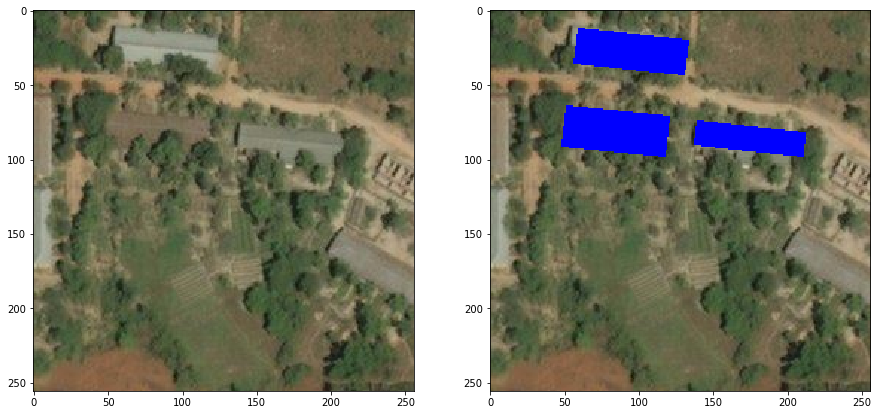

In [9]:
import numpy as np 

labelled_tile = tile.copy()

cv2.fillPoly(labelled_tile, np.array(pix_buildings, dtype='int32'), (255, 0, 0))

plt.figure(figsize=(15, 30))
unlabelled = plt.subplot(121)
unlabelled.imshow(cv2.cvtColor(tile, cv2.COLOR_BGR2RGB))

labelled = plt.subplot(122)
labelled.imshow(cv2.cvtColor(labelled_tile, cv2.COLOR_BGR2RGB))

Great.  Looks like our map tiles correspond correctly to validated building geometry.  We also have the tools to convert and compose tiles with their buildings, which will let us build up a set of ground truth images.

## Training Data

A very small amendment to the above will give us the image we need.

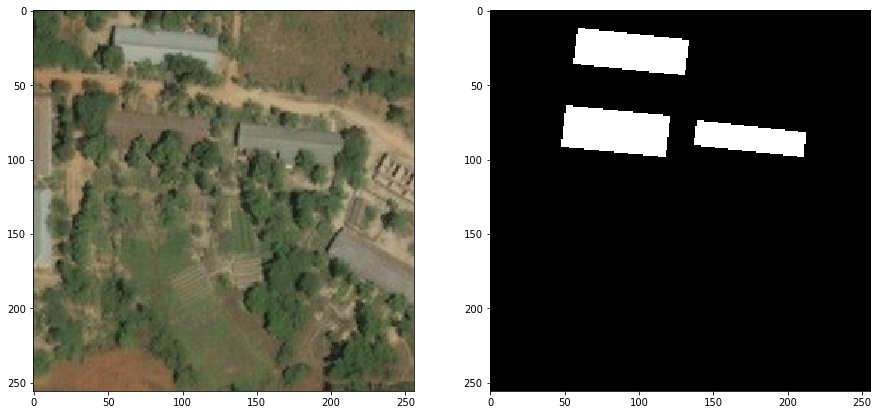

In [10]:
truth = np.zeros([256, 256, 3], np.uint8)
cv2.fillPoly(truth, np.array(pix_buildings, dtype='int32'), (255, 255, 255))

plt.figure(figsize=(15, 30))
unlabelled = plt.subplot(121)
unlabelled.imshow(cv2.cvtColor(tile, cv2.COLOR_BGR2RGB))

labelled = plt.subplot(122)
labelled.imshow(cv2.cvtColor(truth, cv2.COLOR_BGR2RGB))

If we were to use images as our input and our output, we could go down this path.  It would mean output layers that are equal in size to our input layers.  I could imagine modelling this differently, having the system output a list of coordinates rather than a fully filled polygon, but I don't know exactly how this would be implemented in a neural network world.

Scoring would be interesting, most likely starting by counting the number of correct pixels, versus incorrect ones, in the image.  There may need to be skew applied, depending on the type of errors we later see.  Let's save scoring for later as it is a cruicial part of our system that we'll no doubt iterate on a number of times.

# A TensorFlow Experiment

Paying almost zero attention to our model here the aim is simply to train a model using the collected imagery as input and the black and white layer as output.  It'll give us a base to iterate on the model itself, most likely bootstrapping from already existing models.  

We'll also need to revisit the problem of buildings that overlap map tiles.

In [13]:
train = tile / 255

# already 0s and 1s
truth

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)